In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
import pickle

ModuleNotFoundError: No module named 'matplotlib'

In [4]:
from google.colab import files

uploaded = files.upload()

Saving DiabetesData.csv to DiabetesData.csv


In [5]:
# read the data

data = pd.read_csv('DiabetesData.csv')

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**NOTE:** There are few misconceptions for htis dataset features like BMI cannot be 0 , Glucose, Insulin cannot be 0.

**Solution:** So we will replace 0 values with the mean of the respetive feature.

In [9]:
# Replacing 0s with the mean of these 5 features.

data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())

<Axes: >

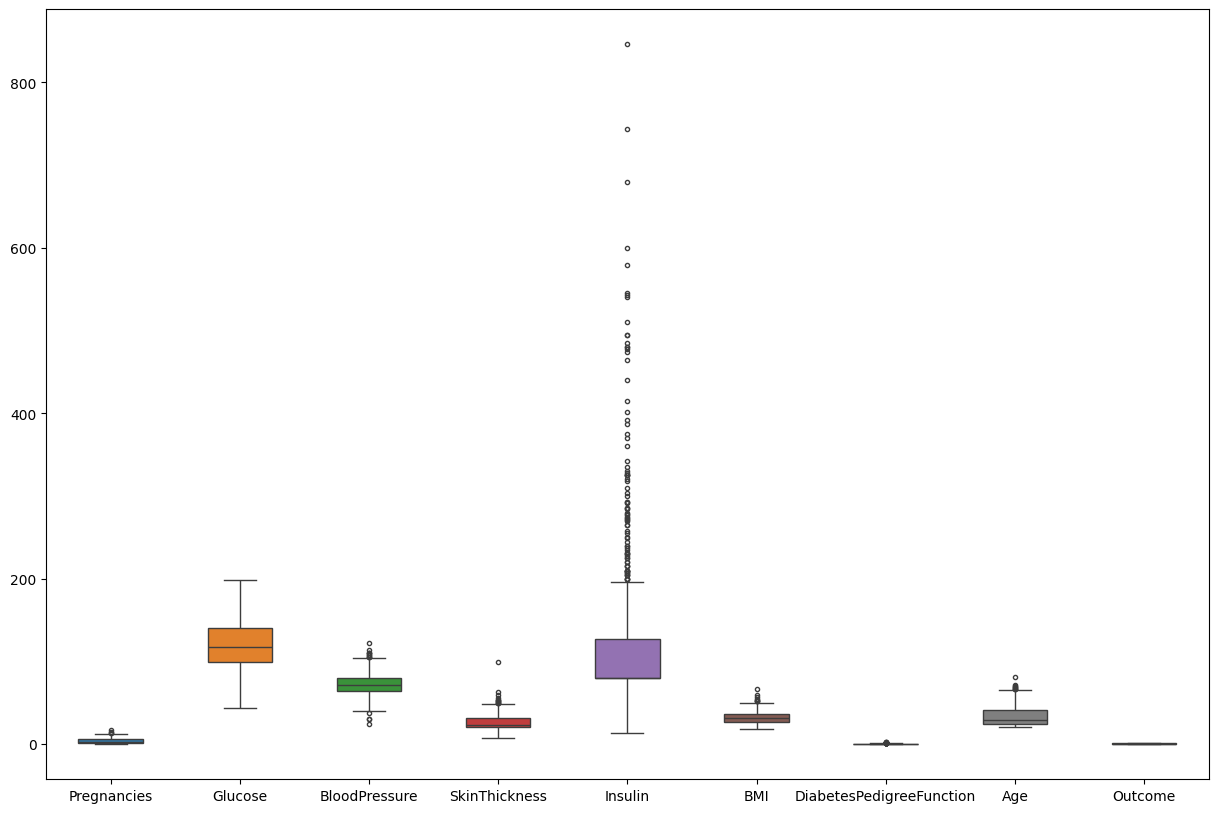

In [10]:
# Check for outliers

fig, axis = plt.subplots( figsize = (15,10) )
sns.boxplot(data = data, width= 0.5, ax= axis, fliersize =3)

Analysis -> We can see that Insulin has most outliers.

# Model training

In [11]:
# Separate x and y features
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [12]:
data.shape, x.shape, y.shape

((768, 9), (768, 8), (768,))

In [13]:
# Train test the model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [14]:
x_train.shape, x_test.shape

((576, 8), (192, 8))

# Feature Scaling and Standarization

In [15]:
# Standarization

def scaler_standard(x_train, x_test):
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train)
  x_test_scaled = scaler.transform(x_test)

  # Saving the scaler model
  pickle.dump( scaler, open('logistic_scaler.pkl','wb') )

  return x_train_scaled, x_test_scaled



### Effects of Standarization in the dataset

In [16]:
x_train_scaled, x_test_scaled = scaler_standard(x_train, x_test)

Text(0.5, 1.0, 'x_train after scaling')

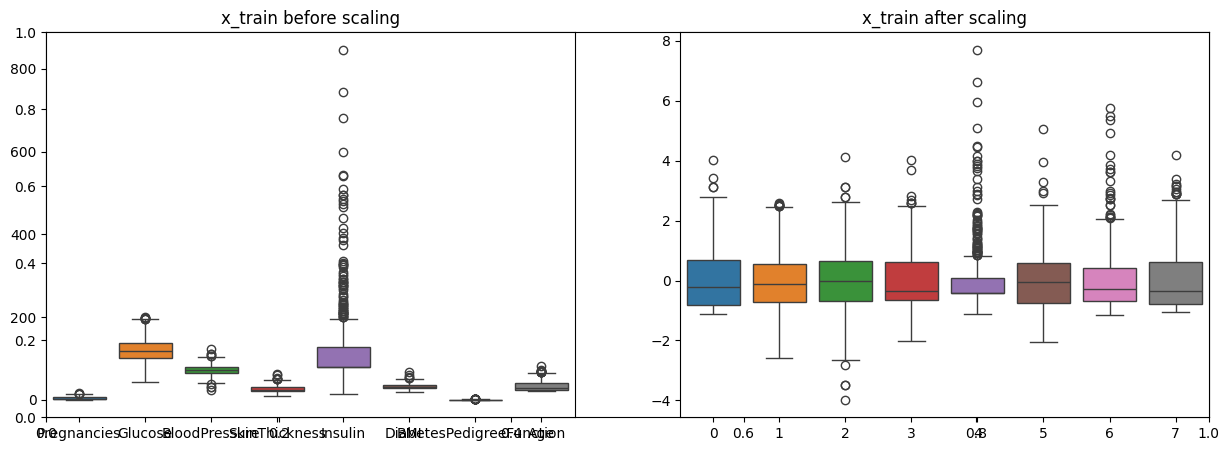

In [18]:
plt.subplots(figsize = (15, 5))

plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title("x_train before scaling")

plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaled)
plt.title("x_train after scaling")

# Defining Logistic Regression model

In [19]:
classifier = LogisticRegression()

In [20]:
classifier.fit(x_train_scaled, y_train)

LogisticRegression()

## Hyperparameter tuning using GridSearchCV technique

In [21]:
from sklearn.model_selection import GridSearchCV

In [23]:
parameters = {'penalty': ['l1','l2','elasticnet','None'],
              'C' : np.logspace(-3,3,7),
              'solver': ['newton-cg', 'lbfgs', 'liblinear']
              }

In [28]:
clf = GridSearchCV(classifier,                # Logistic regression model
                   param_grid = parameters,   # Hyperparameters
                   scoring = 'accuracy',      # Metric for scoring
                   cv = 10)                   # Number of folds

In [29]:
clf

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [30]:
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [31]:
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [32]:
# We got the best parameters to get most accurate results.
# Now we will create model with these parameters.

best_classifier = LogisticRegression(C=0.1, penalty='l1', solver= 'liblinear')

In [33]:
best_classifier

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [34]:
best_classifier.fit(x_train_scaled, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

# Performance metrics

In [35]:
y_pred = best_classifier.predict(x_test_scaled)

In [36]:
print("Confusion matrix -> \n", confusion_matrix(y_test, y_pred))

print("Accuracy score -> ", accuracy_score(y_test, y_pred))

print("Classification report -> \n", classification_report(y_test, y_pred))

Confusion matrix -> 
 [[99 24]
 [28 41]]
Accuracy score ->  0.7291666666666666
Classification report -> 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.63      0.59      0.61        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



# Pickling the model

In [38]:
pickle.dump( best_classifier, open('logisticRegression.pkl','wb') )